# Importing Packages

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt 
%matplotlib inline

## Q1.Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required.

## Importing Dataset


In [2]:
from keras.datasets import cifar10

In [3]:
data=cifar10.load_data()

In [4]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

## splitting data into Train and Test Dataset

In [5]:
(X_train,Y_train),( X_test, Y_test)=data

## Shape of the X_train,Y_train,X_test,Y_test dataset

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
Y_train.shape

(50000, 1)

In [9]:
Y_test.shape

(10000, 1)

## Normalise the data and convertig into continuous data

In [10]:
X_train=X_train.astype('float64')/255
X_test=X_test.astype('float64')/255

## converting data into 0 and 1 encoding format

In [11]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [12]:
num_classes=10
Y_train= to_categorical(Y_train,num_classes)
Y_test=to_categorical(Y_test,num_classes)

## Q.2 Build a CNN architecture with Keras and stack an ANN on top of CNN.


## Build a CNN architecture with Keras 

In [13]:
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

### Summary of CNN Architecture

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

## stack an ANN on top of CNN.

In [15]:
classifier.add(Dense(units = 256, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 126 NEURONS 
classifier.add(Dense(units = 10, activation = 'softmax'))  ## OUTPUT LAYER WITH 10 NUERONS # sigmoid = pro

In [16]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Summary of ANN top of CNN

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 256)               2

### Fit the model

In [18]:
# fit model
history = classifier.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)


Epoch 1/15
1250/1250 - 63s - loss: 0.2378 - accuracy: 0.4445 - val_loss: 0.2010 - val_accuracy: 0.5595 - 63s/epoch - 50ms/step
Epoch 2/15
1250/1250 - 62s - loss: 0.1894 - accuracy: 0.5836 - val_loss: 0.1845 - val_accuracy: 0.5965 - 62s/epoch - 50ms/step
Epoch 3/15
1250/1250 - 54s - loss: 0.1679 - accuracy: 0.6410 - val_loss: 0.1674 - val_accuracy: 0.6407 - 54s/epoch - 43ms/step
Epoch 4/15
1250/1250 - 52s - loss: 0.1524 - accuracy: 0.6801 - val_loss: 0.1654 - val_accuracy: 0.6555 - 52s/epoch - 42ms/step
Epoch 5/15
1250/1250 - 54s - loss: 0.1399 - accuracy: 0.7145 - val_loss: 0.1623 - val_accuracy: 0.6636 - 54s/epoch - 43ms/step
Epoch 6/15
1250/1250 - 58s - loss: 0.1278 - accuracy: 0.7433 - val_loss: 0.1550 - val_accuracy: 0.6779 - 58s/epoch - 46ms/step
Epoch 7/15
1250/1250 - 56s - loss: 0.1175 - accuracy: 0.7685 - val_loss: 0.1571 - val_accuracy: 0.6830 - 56s/epoch - 45ms/step
Epoch 8/15
1250/1250 - 56s - loss: 0.1073 - accuracy: 0.7956 - val_loss: 0.1573 - val_accuracy: 0.6869 - 56s/ep

## Q.3 Fit and evaluate the model. Plot the training and validation curves.

### Fit Model

In [19]:
history = classifier.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 55s - loss: 0.0432 - accuracy: 0.9437 - val_loss: 0.2389 - val_accuracy: 0.6844 - 55s/epoch - 44ms/step
Epoch 2/15
1250/1250 - 57s - loss: 0.0379 - accuracy: 0.9533 - val_loss: 0.2550 - val_accuracy: 0.6801 - 57s/epoch - 46ms/step
Epoch 3/15
1250/1250 - 57s - loss: 0.0339 - accuracy: 0.9610 - val_loss: 0.2810 - val_accuracy: 0.6786 - 57s/epoch - 45ms/step
Epoch 4/15
1250/1250 - 53s - loss: 0.0299 - accuracy: 0.9689 - val_loss: 0.2999 - val_accuracy: 0.6771 - 53s/epoch - 43ms/step
Epoch 5/15
1250/1250 - 53s - loss: 0.0263 - accuracy: 0.9750 - val_loss: 0.3261 - val_accuracy: 0.6678 - 53s/epoch - 43ms/step
Epoch 6/15
1250/1250 - 53s - loss: 0.0237 - accuracy: 0.9791 - val_loss: 0.3305 - val_accuracy: 0.6781 - 53s/epoch - 43ms/step
Epoch 7/15
1250/1250 - 55s - loss: 0.0223 - accuracy: 0.9811 - val_loss: 0.3460 - val_accuracy: 0.6758 - 55s/epoch - 44ms/step
Epoch 8/15
1250/1250 - 57s - loss: 0.0197 - accuracy: 0.9840 - val_loss: 0.3915 - val_accuracy: 0.6715 - 57s/ep

### Evaluate the model

In [20]:
score = classifier.evaluate(X_test, Y_test, batch_size=128, verbose=0)
score

[0.4856084883213043, 0.6622999906539917]

In [21]:
print(classifier.metrics_names)

['loss', 'accuracy']


## Plot the training and validation curves

In [22]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

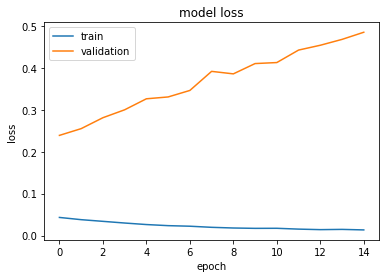

In [23]:
plotLosses(history)

In [35]:
def plotLosses(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

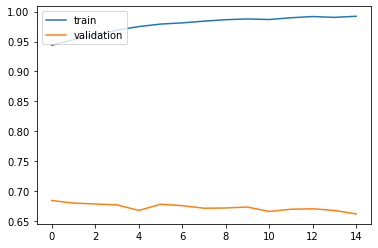

In [36]:
plotLosses(history)

In [31]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['accuracy'])
   
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

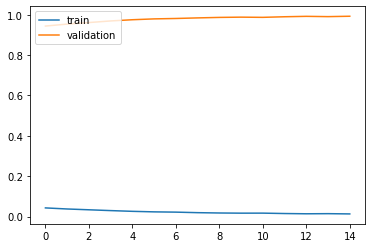

In [32]:
plotLosses(history)

In [43]:
def plotLosses(history):  
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['val_accuracy'])
   
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

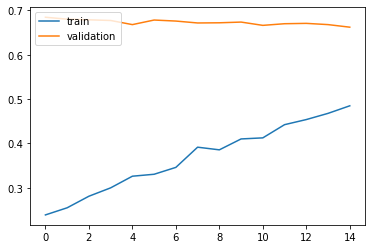

In [44]:
plotLosses(history)